In [54]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.objectives import categorical_crossentropy
import numpy as np



import tensorflow as tf
sess = tf.Session()
K.set_session(sess)
saver=tf.train.Saver()
lr=0.01
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#----------------------- Model--------------------------------
x = tf.placeholder(tf.float32, shape=(None, 28,28,1))
y = tf.placeholder(tf.float32, shape=(None, 10))

out = Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)(x)
out = Conv2D(64, (3, 3), activation='relu')(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
#out = Dropout(0.25)(out)
out = Flatten()(out)
out = Dense(128, activation='relu')(out)
#out = Dropout(0.5)(out)
y_ = Dense(num_classes, activation='softmax')(out)

lossfn = tf.reduce_mean(categorical_crossentropy(y,y_))
gradfn = tf.train.AdamOptimizer(lr).minimize(lossfn)

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
with sess.as_default():
    for epoch in range(100):
        for b in range(60):
            xint=x_train[b*100:(b+1)*100,:,:,:]
            yint=y_train[b*100:(b+1)*100,:]
            gradfn.run(feed_dict={x:xint,y:yint})
            if b%10==0:print('loss',sess.run(lossfn,{x:xint,y:yint}))
        print('Test Accuracy ---------------')
        yest=sess.run(y_,{x:x_test[:500,:,:,:]})
        saver.save(sess, "models/mnist.ckpt")

        print(float(np.sum(np.argmax(yest[:500,:],axis=1)==np.argmax(y_test[:500,:],axis=1)))/500)
        print('--------------------')
#--------------------------------------------------------------



x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
60000 train samples
10000 test samples
loss 3.47164
loss 1.48377
loss 0.593653
loss 0.388341
loss 0.305954
loss 0.104656
Test Accuracy ---------------
0.93
--------------------
loss 0.150562
loss 0.184962


KeyboardInterrupt: 

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

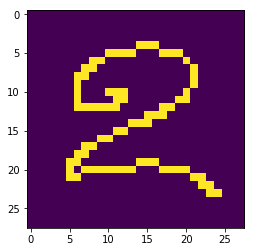

In [55]:
#-----------------------------
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps    
import numpy as np
numimg = Image.open("images/two.jpg")
numimg=PIL.ImageOps.invert(numimg)
numimg=numimg.resize( [28,28])
numimg= numimg.convert('1') # convert image to black and white
plt.imshow(np.array(numimg)*255)
np.set_printoptions(threshold=np.nan)
print(np.array(numimg,dtype='uint8'))

In [56]:
with  sess.as_default():
    #saver.restore(sess, "models/mnist.ckpt")
    modimg=np.array(np.array(numimg),dtype='uint8')*255
    modimg=modimg.reshape([1,28,28,1])
    #print(modimg.shape)
    res=sess.run(y_,{x:modimg})
    print(np.argmax(res))

2
